# Exploratory Data Analysis: Citation Count Distribution

In [1]:
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.probability import FreqDist

plt.rcParams.update({'font.size': 18})

# Load data

In [4]:
df = pd.read_csv('../data/data_processed.csv', sep = '\t')
print('Data size', df.shape)
df.head()

Data size (295174, 20)


,abstract,arXiv_id,authors,categories,comments,date_created,doi,title,num_of_authors,year,month,day_of_week,num_of_pages,num_of_figures,length_of_abstr,citation_count,p_age,wday_ct,month_ct,year_ct
0,We study the two-particle wave function of p...,704.0006,"['PongY. H.', 'LawC. K.']",['cond-mat.mes-hall'],"6 pages, 4 figures, accepted by PRA",2007-03-31,10.1103/PhysRevA.75.043613,Bosonic characters of atomic Cooper pairs acro...,2,2007,March,Saturday,6.0,4.0,918,13,13,14925,25778,10406
1,A general formulation was developed to repre...,704.0008,['SwiftDamian C.'],['cond-mat.mtrl-sci'],Minor corrections,2007-03-31,10.1063/1.2975338,Numerical solution of shock and ramp compressi...,1,2007,March,Saturday,NaN,NaN,949,12,13,14925,25778,10406
2,We present recent advances in understanding ...,704.0025,"[""MishchenkoA. S.CREST, Japan Science and Tech...","['cond-mat.str-el', 'cond-mat.stat-mech']","41 pages, 13 figures, in ""Polarons in Advanced...",2007-04-02,10.1007/978-1-4020-6348-0_12,Spectroscopic Properties of Polarons in Strong...,2,2007,April,Monday,41.0,13.0,655,5,13,54239,23902,10406
3,We describe a peculiar fine structure acquir...,704.0027,"['GoerbigM. O.', 'FuchsJ. -N.', 'KechedzhiK.',...",['cond-mat.mes-hall'],"4 pages, 2 figures; mistakes due to an erroneo...",2007-04-02,10.1103/PhysRevLett.99.087402,Filling-Factor-Dependent Magnetophonon Resonan...,4,2007,April,Monday,4.0,2.0,618,70,13,54239,23902,10406
4,We investigate the effect of tuning the phon...,704.003,"['HagueJ. P.', ""d'AmbrumenilN.""]",['cond-mat.str-el'],"Reprint to improve access. 13 pages, 6 figures.",2007-03-31,10.1007/s10909-005-6013-6,Tuning correlation effects with electron-phono...,2,2007,March,Saturday,13.0,6.0,779,2,13,14925,25778,10406


# Trends of citation count

In [5]:
df_cit = df.copy()

## 1. Distribution of citation count
The top plot below shows that a large number of research papers attract only a few citations, and a few research papers accumulate a large number of citations.

In [6]:
pvt = df_cit.pivot_table('arXiv_id', index='citation_count', aggfunc = 'count')
pvt = pvt.unstack().dropna().reset_index()
pvt.columns = ['id', 'citation_count', 'num_papers']
pvt.drop('id', axis =1, inplace = True)
pvt.tail()

,citation_count,num_papers
1117,8091,1
1118,10062,1
1119,11191,1
1120,12092,1
1121,19719,1


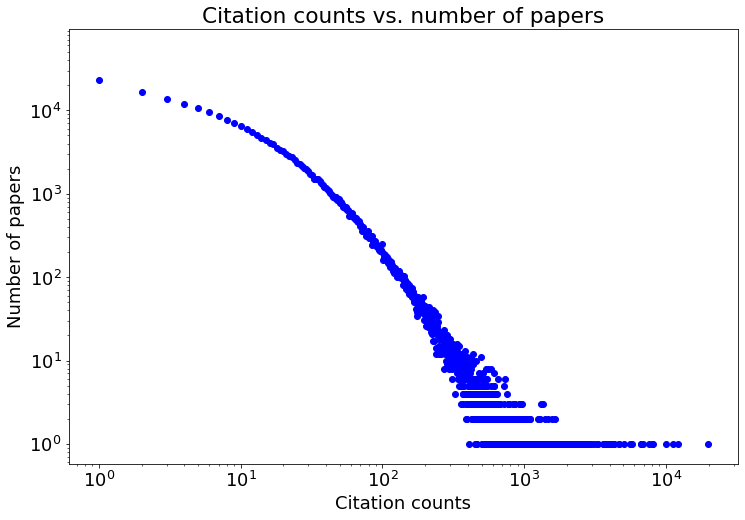

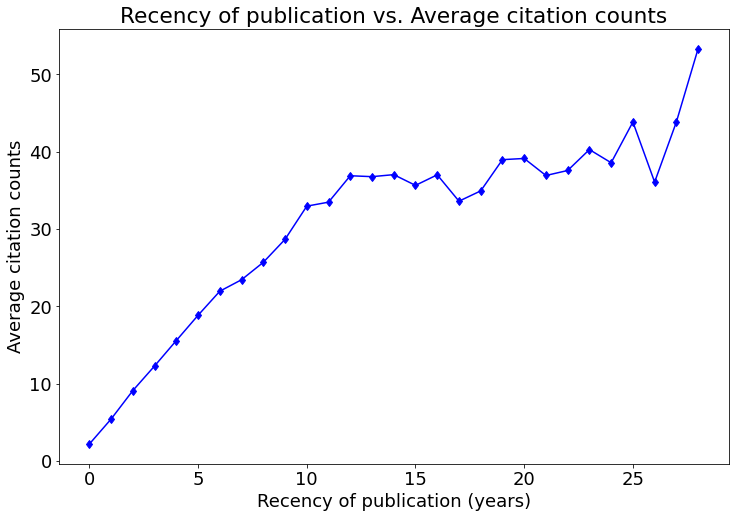

<Figure size 432x288 with 0 Axes>

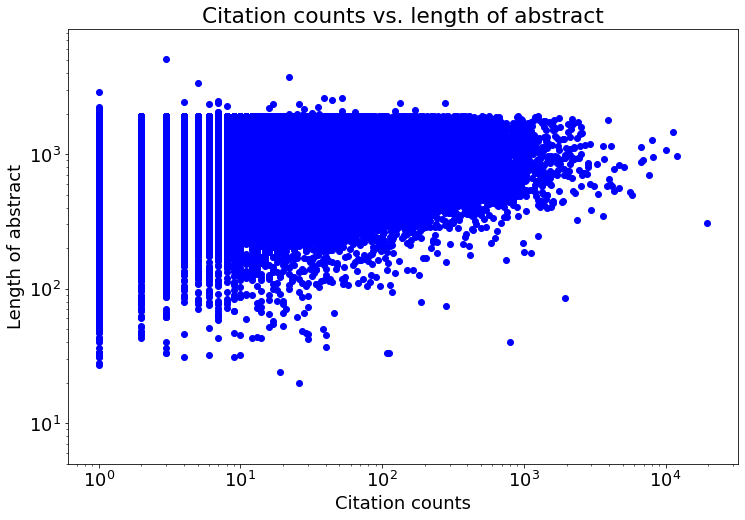

In [7]:
plt.subplots(figsize = (12,8))
plt.loglog(pvt['citation_count'], pvt['num_papers'], linestyle = 'None',
           color = 'b', marker = "o")
plt.xlabel('Citation counts')
plt.ylabel("Number of papers")
plt.title("Citation counts vs. number of papers")
plt.savefig('../images/fig5a.png')

plt.figure()
df_cit.groupby('p_age')['citation_count'].mean().plot(color = 'b', marker = "d", figsize = (12,8))
plt.xlabel('Recency of publication (years)')
plt.ylabel('Average citation counts')
plt.title("Recency of publication vs. Average citation counts")
plt.savefig('../images/fig5c.png')

plt.figure()
plt.subplots(figsize = (12,8))
plt.loglog(df_cit['citation_count'], df_cit['length_of_abstr'], linestyle = 'None', 
           color = 'b', marker = "o")
plt.xlabel('Citation counts')
plt.ylabel("Length of abstract")
plt.title("Citation counts vs. length of abstract")
plt.savefig('../images/fig5b.png')

## 2. arXiv ID with most citation counts

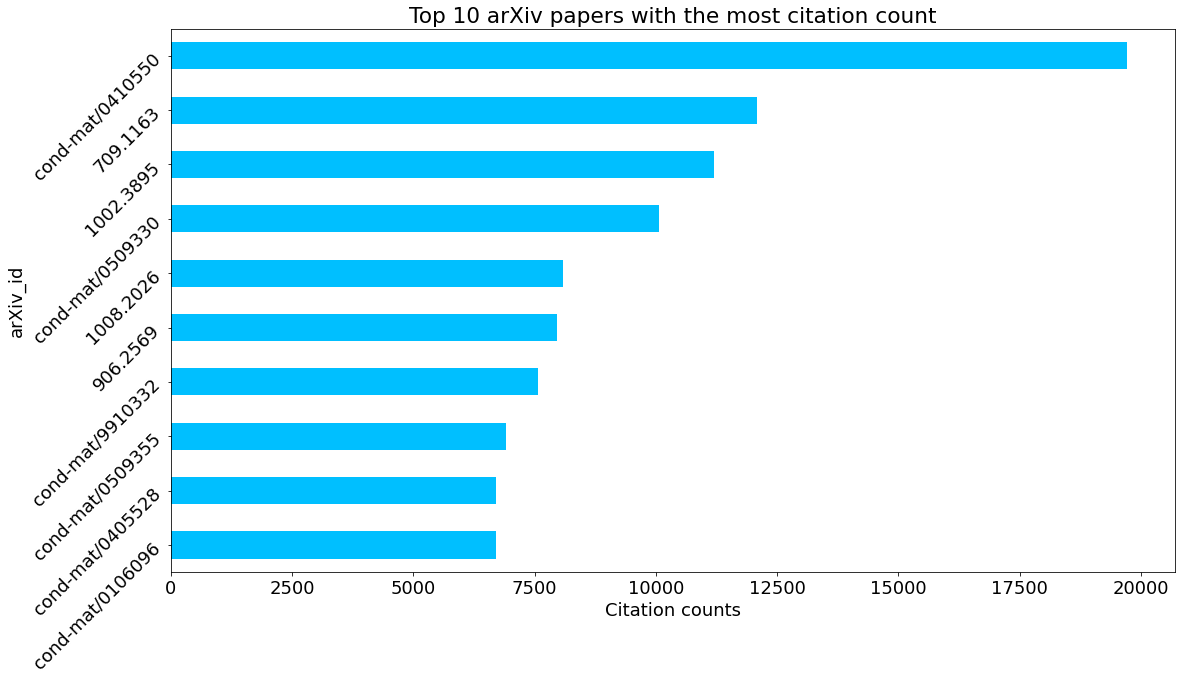

In [8]:
grp = df.groupby('arXiv_id')['citation_count'].sum().sort_values(ascending=True)
grp.tail(10).plot(kind = 'barh', figsize=(18,10), color = 'deepskyblue')
plt.xlabel('Citation counts')
plt.yticks(rotation = 45)
plt.title("Top 10 arXiv papers with the most citation count")
plt.savefig('../images/fig5d.png')